a)Construya un dataframe con los datos a analizar descargando los datos desde la URL mantenida por los autores de The Elements of Statistical Learning. Convierta la variable CHAS a un vector binario de dos componentes indicando las 2 posibilidades de su valor, indique la conveniencia de este paso. Describa brevemente el dataset utilizar.

In [3]:
import pandas as pd
from sklearn.cross_validation import train_test_split

url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df = pd.get_dummies(df,columns=["CHAS"]) #to categorical

df_train,df_test = train_test_split(df,test_size=0.25, random_state=0)

/home/nacho/anaconda3/envs/redesneuronales/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
print("Tamaño del dataset: ", df.shape)
print("Tamaño del training set: ", df_train.shape)
print("Tamaño del test set: ", df_test.shape)
df.info()

Tamaño del dataset:  (506, 15)
Tamaño del training set:  (379, 15)
Tamaño del test set:  (127, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
CRIM       506 non-null float64
ZN         506 non-null int64
INDUS      506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null int64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
CHAS_0     506 non-null uint8
CHAS_1     506 non-null uint8
dtypes: float64(9), int64(4), uint8(2)
memory usage: 52.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_0,CHAS_1
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.347826,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.083004,356.674032,12.653063,22.532806,0.930830,0.069170
std,8.601545,23.310593,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.280574,91.294864,7.141062,9.197104,0.253994,0.253994
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.000000,0.320000,1.730000,5.000000,0.000000,0.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.000000,375.377500,6.950000,17.025000,1.000000,0.000000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.000000,391.440000,11.360000,21.200000,1.000000,0.000000
75%,3.677082,12.000000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.000000,396.225000,16.955000,25.000000,1.000000,0.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000,1.000000


In [6]:
# Normalización de los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train), columns=df_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(df_test), columns=df_train.columns)

y_train_scaled = X_train_scaled.pop('MEDV').values.reshape([-1,1])
y_test_scaled = X_test_scaled.pop('MEDV').values.reshape([-1,1])

X_train_scaled.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_0,CHAS_1
count,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02
mean,4.218262e-17,2.343479e-17,8.436523e-17,7.194480e-16,-7.733480e-16,1.921653e-16,-2.085696e-16,1.335783e-16,1.476392e-16,-5.893849e-16,-2.999653e-16,2.460653e-16,1.839631e-16,5.975871e-17
std,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00
min,-4.130329e-01,-4.985312e-01,-1.514998e+00,-1.475198e+00,-3.973687e+00,-2.336467e+00,-1.246426e+00,-9.707975e-01,-1.263794e+00,-2.658465e+00,-4.025619e+00,-1.503671e+00,-3.762978e+00,-2.657470e-01
25%,-4.046811e-01,-4.985312e-01,-8.618530e-01,-9.235945e-01,-5.894549e-01,-8.334908e-01,-8.037506e-01,-6.245626e-01,-7.436108e-01,-4.879389e-01,1.944575e-01,-8.127456e-01,2.657470e-01,-2.657470e-01
50%,-3.818337e-01,-4.985312e-01,-3.598727e-01,-1.565211e-01,-1.208466e-01,3.323363e-01,-2.706425e-01,-5.091510e-01,-4.338385e-01,3.802716e-01,3.719387e-01,-1.843784e-01,2.657470e-01,-2.657470e-01
75%,-1.827370e-03,3.430872e-01,1.000608e+00,6.450276e-01,5.246631e-01,8.895201e-01,6.379857e-01,1.683670e+00,1.535846e+00,8.143769e-01,4.171933e-01,6.233235e-01,2.657470e-01,-2.657470e-01
max,1.037470e+01,3.709561e+00,2.375350e+00,2.713540e+00,3.563035e+00,1.109554e+00,3.988486e+00,1.683670e+00,1.798860e+00,1.682587e+00,4.277489e-01,3.396758e+00,2.657470e-01,3.762978e+00


Para un mejor trabajo y entrenamiento, además de hacer un escalamiento de los datos, se tiene que escalar la variable objetivo $y$.

b) Muestre en un gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de epochs de entrenamiento, para una red feedforward de 3 capas, con 200 unidades ocultas y función de activación sigmoidal. Entrene la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 300 epochs de entrenamiento, en el conjunto de entrenamiento y de pruebas. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.

In [7]:
print(X_test_scaled.shape)
print(X_train_scaled.shape)
print(y_test_scaled.shape)
print(y_train_scaled.shape)

(127, 14)
(379, 14)
(127, 1)
(379, 1)


b) Muestre en un gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de epochs de entrenamiento, para una red feedforward de 3 capas, con 200 unidades ocultas y función de activación sigmoidal. Entrene la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 300 epochs de entrenamiento, en el conjunto de entrenamiento y de pruebas. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

def network(activation='sigmoid'):
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
    model.add(Activation(activation))
    model.add(Dense(1, kernel_initializer='uniform'))
    model.add(Activation('linear'))
    return model

In [7]:
model = network(activation='sigmoid')
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled, y_train_scaled, epochs=300,verbose=0, 
                 validation_data=(X_test_scaled, y_test_scaled))

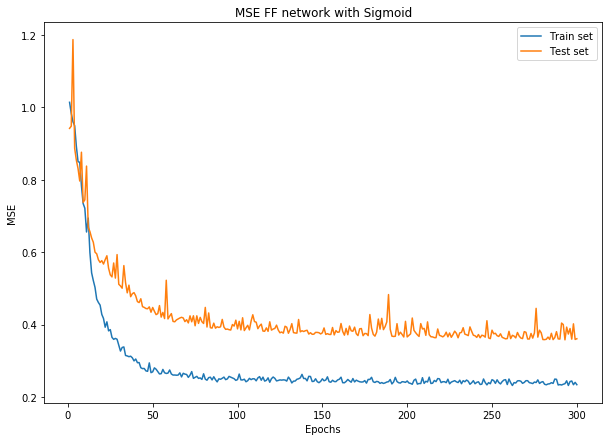

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

history_sigmoidal = hist.history
x = range(1,301)

plt.figure(figsize=(10,7))
plt.plot(x, history_sigmoidal['loss'])
plt.plot(x, history_sigmoidal['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['Train set', 'Test set'])
plt.title('MSE FF network with Sigmoid')
plt.show()

c) Repita el paso anterior, utilizado ’ReLU’ como función de activación y compare con lo obtenido en b).

In [9]:
model_relu = network(activation='relu')
sgd = SGD(lr=0.01)
model_relu.compile(optimizer=sgd,loss='mean_squared_error')

hist = model_relu.fit(X_train_scaled, y_train_scaled, epochs=300,verbose=0, 
                 validation_data=(X_test_scaled, y_test_scaled))

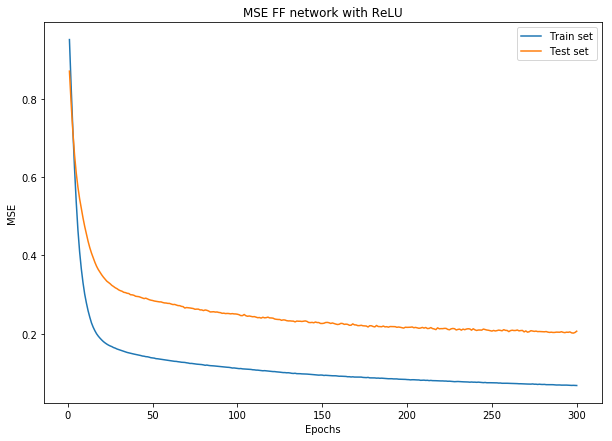

In [10]:
history_relu = hist.history

plt.figure(figsize=(10,7))
plt.plot(x, history_relu['loss'])
plt.plot(x, history_relu['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['Train set', 'Test set'])
plt.title('MSE FF network with ReLU')
plt.show()

d) Repita b) y c) variando la tasa de aprendizaje (learning rate) en un rango sensible. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.

In [62]:
import numpy as np
n_lr = 21
# Too high values
#learn_rate = np.linspace(0,1,20)
learn_rate = [0.0005,0.001, 0.0015, 0.002, 0.0035, 0.005, 0.01, 0.015]

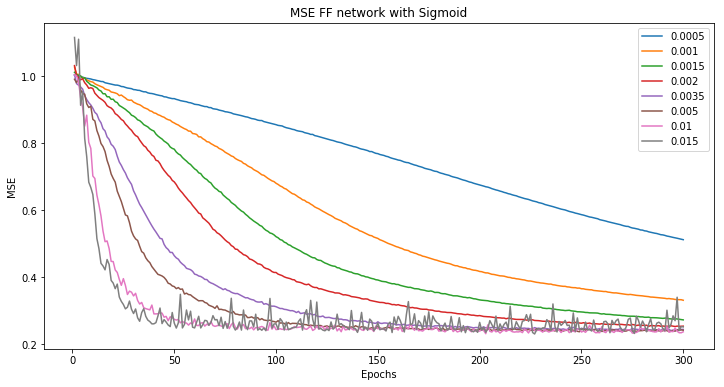

In [64]:
plt.figure(figsize=(12,6))
for rate in learn_rate:
    # sigmoidal
    model = network()
    sgd = SGD(lr=rate)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled, y_train_scaled, epochs=300,verbose=0, 
                 validation_data=(X_test_scaled, y_test_scaled))
    plt.plot(x, hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend([str(rate) for rate in learn_rate])
plt.title('MSE FF network with Sigmoid')
plt.show()

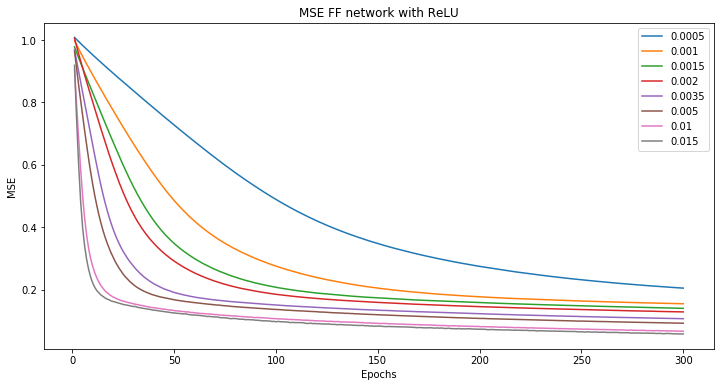

In [65]:
plt.figure(figsize=(12,6))
for rate in learn_rate:
    model = network(activation="relu")
    sgd = SGD(lr=rate)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist = model.fit(X_train_scaled, y_train_scaled, epochs=300,verbose=0, 
                 validation_data=(X_test_scaled, y_test_scaled))
    plt.plot(x, hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend([str(rate) for rate in learn_rate])
plt.title('MSE FF network with ReLU')
plt.show()

In [39]:
model = network()
sgd = SGD(lr=0.2)
model.compile(optimizer=sgd,loss='mean_squared_error')
hist = model.fit(X_train_scaled, y_train_scaled, epochs=5,verbose=1, 
                 validation_data=(X_test_scaled, y_test_scaled))

Train on 379 samples, validate on 127 samples
Epoch 1/5
379/379 [==============================] - 2s 4ms/step - loss: 152608901677125162999218176.0000 - val_loss: 1146852240707664119134775410688.0000
Epoch 2/5
379/379 [==============================] - 0s 61us/step - loss: nan - val_loss: nan            
Epoch 3/5
379/379 [==============================] - 0s 87us/step - loss: nan - val_loss: nan
Epoch 4/5
379/379 [==============================] - 0s 93us/step - loss: nan - val_loss: nan
Epoch 5/5
379/379 [==============================] - 0s 77us/step - loss: nan - val_loss: nan


e) Entrene los modelos considerados en b) y c) usando progressive decay. Compare y comente.

In [80]:
n_decay = 8
learn_decay = np.logspace(-6,-1,n_decay)
#sgd = SGD(lr=0.2, decay=1e-6)
learn_decay = [1e-6, 1e-5, 1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1]

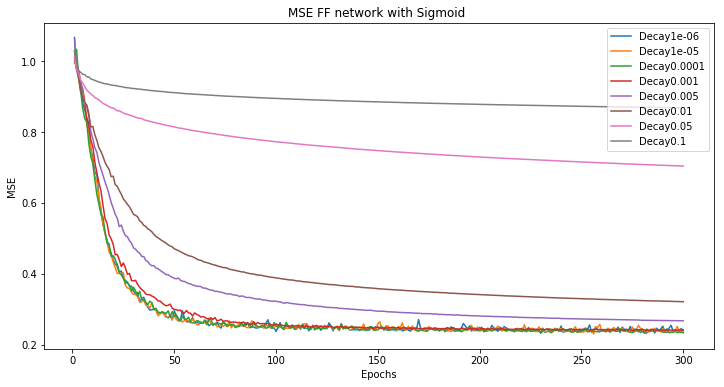

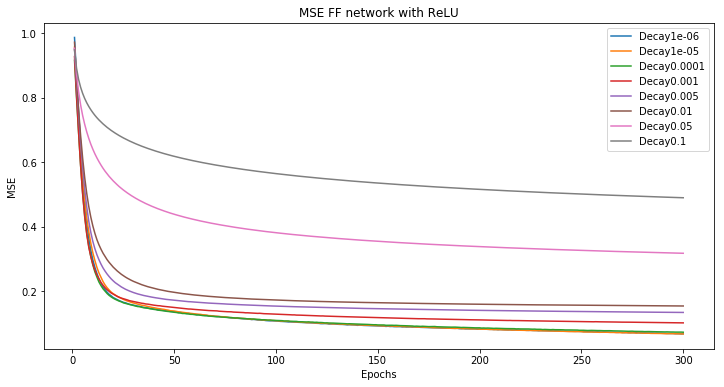

In [81]:
plt.figure(figsize=(12,6))
for d in learn_decay:
    model = network(activation="sigmoid")
    sgd = SGD(lr=0.01, decay=d)
    model.compile(optimizer=sgd, loss='mean_squared_error')

    hist = model.fit(X_train_scaled, y_train_scaled, epochs=300,verbose=0, 
                 validation_data=(X_test_scaled, y_test_scaled))
    plt.plot(x, hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['Decay'+str(rate) for rate in learn_decay])
plt.title('MSE FF network with Sigmoid ')
plt.show()

plt.figure(figsize=(12,6))
for d in learn_decay:
    model = network(activation="relu")
    sgd = SGD(lr=0.01, decay=d)
    model.compile(optimizer=sgd, loss='mean_squared_error')

    hist = model.fit(X_train_scaled, y_train_scaled, epochs=300,verbose=0, 
                 validation_data=(X_test_scaled, y_test_scaled))
    plt.plot(x, hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['Decay'+str(rate) for rate in learn_decay])
plt.title('MSE FF network with ReLU')
plt.show()

f) Entrene los modelos considerados en b) y c) utilizando SGD en mini-batches. Experimente con diferentes tamaños del batch. Comente.

In [29]:
n_batches = 21
#batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))
batch_sizes = [2, 20, 40, 80, 160, 200, 379]
print(batch_sizes)

[2, 20, 40, 80, 160, 200, 379]


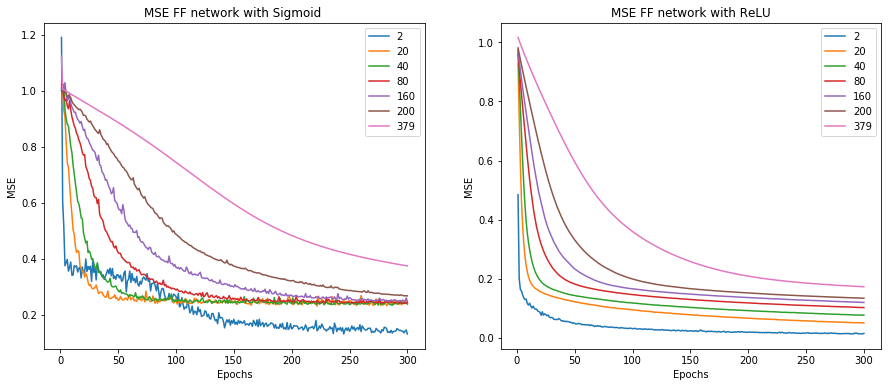

In [37]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
for b_size in batch_sizes:
    model = network(activation="sigmoid")
    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd, loss='mean_squared_error')

    hist = model.fit(X_train_scaled, y_train_scaled, epochs=300,verbose=0, batch_size=b_size,
                 validation_data=(X_test_scaled, y_test_scaled))
    plt.plot(x, hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend([str(bath_size) for bath_size in batch_sizes])
plt.title('MSE FF network with Sigmoid ')

plt.subplot(1, 2, 2)
for b_size in batch_sizes:
    model = network(activation="relu")
    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd, loss='mean_squared_error')

    hist = model.fit(X_train_scaled, y_train_scaled, epochs=300,verbose=0, batch_size=b_size,
                 validation_data=(X_test_scaled, y_test_scaled))
    plt.plot(x, hist.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend([str(bath_size) for bath_size in batch_sizes])
plt.title('MSE FF network with ReLU')
plt.show()

g) Entrene los modelos obtenidos en b) y c) utilizando estrategias modernas para adaptar la tasa de aprendizaje. Compare los desempeños de adagrad, adadelta, RMSprop y adam. ¿Se observa en algún caso un mejor resultado final? ¿Se observa en algún caso una mayor velocidad de convergencia sobre el dataset de entrenamiento? ¿Sobre el dataset de pruebas?

In [16]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
optimizers_ = [SGD, Adam, RMSprop, Adagrad, Adadelta] 

relu_hist = []
sigmoid_hist = []

for optimizer in optimizers_:
    opt = optimizer(lr=0.01)
    # sigmoid
    model = network(activation="sigmoid")
    model.compile(optimizer=opt, loss='mean_squared_error')

    hist = model.fit(X_train_scaled, y_train_scaled, epochs=300,verbose=0, 
                 validation_data=(X_test_scaled, y_test_scaled))
    sigmoid_hist.append(hist.history)
    
    # relu
    model = network(activation="relu")
    model.compile(optimizer=opt, loss='mean_squared_error')

    hist = model.fit(X_train_scaled, y_train_scaled, epochs=300,verbose=0, 
                 validation_data=(X_test_scaled, y_test_scaled))
    relu_hist.append(hist.history)    

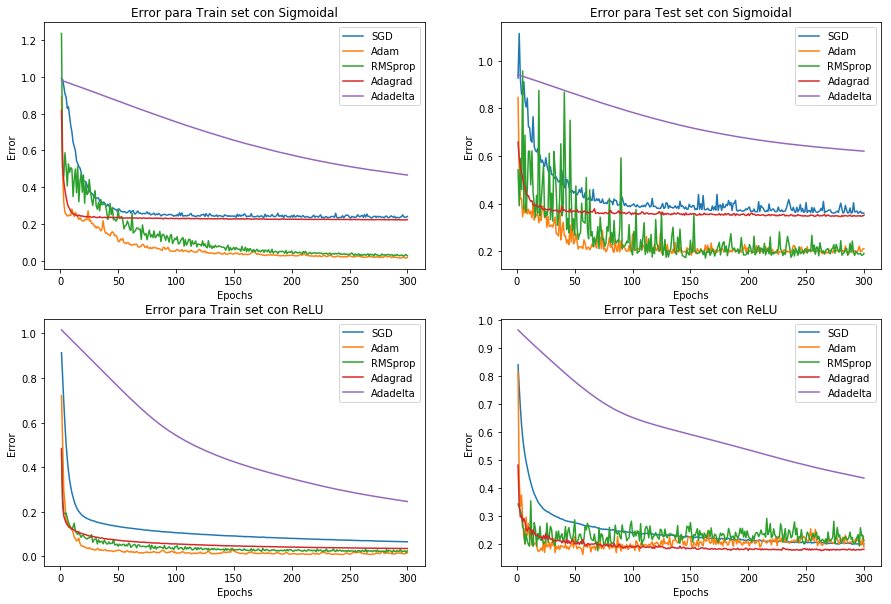

In [24]:
legend = [opt.__name__  for opt in optimizers_]
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
for h in sigmoid_hist:
    plt.plot(x, h['loss'])
plt.title('Error para Train set con Sigmoidal')
plt.legend(legend)
plt.xlabel('Epochs')
plt.ylabel('Error')

plt.subplot(2, 2, 2)
for h in sigmoid_hist:
    plt.plot(x, h['val_loss'])
plt.title('Error para Test set con Sigmoidal')
plt.legend(legend)
plt.xlabel('Epochs')
plt.ylabel('Error')

plt.subplot(2, 2, 3)
for h in relu_hist:
    plt.plot(x, h['loss'])
plt.title('Error para Train set con ReLU')
plt.legend(legend)
plt.xlabel('Epochs')
plt.ylabel('Error')

plt.subplot(2, 2, 4)
for h in relu_hist:
    plt.plot(x, h['val_loss'])
plt.title('Error para Test set con ReLU')
plt.legend(legend)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

h) Entrene los modelos obtenidos en b) y c) utilizando regularizadores $l_1$ y $l_2$ (weight decay). Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente. Además evalúe el efecto de regularizar solo la primera capa vs la segunda, comente.

In [ ]:
model = Sequential()
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]
model.add(Dense(200,input_dim=idim,kernel_initializer='uniform',W_regularizer=l2(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',W_regularizer=l2(0.01)))
model.add(Activation('linear'))

i) Entrene los modelos obtenidos en b) y c) utilizando Dropout. Compare los desempeños de prueba obtenidos antes y después de regularizar. Experimente con distintos valores del parámetro de regularización y comente.

In [45]:
# models without regularization
model = network(activation='sigmoid')
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled, y_train_scaled, epochs=300, verbose=0)
print("Test loss for sigmoid: ", model.evaluate(X_test_scaled, y_test_scaled))

model = network(activation='relu')
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled, y_train_scaled, epochs=300, verbose=0)
print("Test loss for ReLU: ", model.evaluate(X_test_scaled, y_test_scaled))

127/127 [==============================] - 1s 5ms/step
Test loss for sigmoid:  0.3727326569125408
127/127 [==============================] - 1s 6ms/step
Test loss for ReLU:  0.20173660923880854


In [53]:
from keras.layers import Dropout

def dropout_network(rate, activation='sigmoid'):
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform'))
    model.add(Activation(activation))
    model.add(Dropout(rate))
    model.add(Dense(1, kernel_initializer='uniform'))
    model.add(Activation('linear'))
    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    model.fit(X_train_scaled, y_train_scaled, epochs=300, verbose=0)
    print("Test loss for " + activation + ": ", model.evaluate(X_test_scaled, y_test_scaled))

In [57]:
ratios = [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1]
for r in ratios:
    print("--- Using rate = %f ---" % r)
    dropout_network(rate=r, activation='sigmoid')
    dropout_network(rate=r, activation='relu')

--- Using rate = 0.000100 ---
127/127 [==============================] - 1s 6ms/step
Test loss for sigmoid:  0.36421061489056417
127/127 [==============================] - 1s 5ms/step
Test loss for relu:  0.19675395520418648
--- Using rate = 0.001000 ---
127/127 [==============================] - 1s 6ms/step
Test loss for sigmoid:  0.3607154875759065
127/127 [==============================] - 1s 6ms/step
Test loss for relu:  0.2023577667244776
--- Using rate = 0.010000 ---
127/127 [==============================] - 1s 5ms/step
Test loss for sigmoid:  0.4256292011324815
127/127 [==============================] - 1s 5ms/step
Test loss for relu:  0.20188942352148492
--- Using rate = 0.100000 ---
127/127 [==============================] - 1s 6ms/step
Test loss for sigmoid:  0.3819447353364914
127/127 [==============================] - 1s 7ms/step
Test loss for relu:  0.20238256882729494
--- Using rate = 0.250000 ---
127/127 [==============================] - 1s 6ms/step
Test loss for sigmo

j) Fijando todos los demás hiper-parámetros del modelo definido en b) y en c), utilice validación cruzada con un número de folds igual a K = 5 y K=10 para determinar el mejor valor correspondiente a un parámetro que usted elija (tasa de aprendizaje, número de neuronas, parámetro de regularización, etc) ¿El mejor parámetro para la red con sigmoidal es distinto que para ReLU? ¿Porqué sucede? Además mida el error real del modelo sobre el conjunto de pruebas, compare y concluya.

In [ ]:
from sklearn import cross_validation
Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()
kfold = cross_validation.KFold(len(Xm), 10)
cvscores = []
for i, (train, val) in enumerate(kfold):
    # create model
    model = #model with hiperparam
    # Compile model
    model.compile(optimizer=,loss='mean_squared_error')
    # Fit the model
    model.fit(Xm[train], ym[train], epochs=300)
    # evaluate the model
    scores = model.evaluate(Xm[val], ym[val])
    cvscores.append(scores)
mse_cv = np.mean(cvscores)